<h1> Pré-projeto referente a neurorobótica.</h1>

Este projeto usa a base https://www.kaggle.com/datasets/aymanmostafa11/eeg-motor-imagery-bciciv-2a do Kaggle e tem o objetivo de através do equipamento mindBEAGLE PRO: https://www.gtec.at/product-configurator/mindbeagle/ tentar encontrar algum padrão de ondas cerebrais quando a pessoa pensa em um movimento do corpo.</br>
A origem do dataset é do artigo: https://www.bbci.de/competition/iv/desc_2a.pdf, referente a competição BCI 2008 (Brain Computer Interface).

In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort

In [ ]:
!apt-get install graphviz graphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://a

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, confusion_matrix, precision_score, classification_report
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from autogluon.tabular import TabularDataset, TabularPredictor
import pygraphviz

#from autosklearn.classification import AutoSklearnClassifier

#Verificando Base de dados

In [ ]:
df = pd.read_csv('/content/BCICIV_2a_all_patients.csv')

In [ ]:
df.columns

Index(['patient', 'time', 'label', 'epoch', 'EEG-Fz', 'EEG-0', 'EEG-1',
       'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz',
       'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12',
       'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492048 entries, 0 to 492047
Data columns (total 26 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   patient  492048 non-null  int64  
 1   time     492048 non-null  float64
 2   label    492048 non-null  object 
 3   epoch    492048 non-null  int64  
 4   EEG-Fz   492048 non-null  float64
 5   EEG-0    492048 non-null  float64
 6   EEG-1    492048 non-null  float64
 7   EEG-2    492048 non-null  float64
 8   EEG-3    492048 non-null  float64
 9   EEG-4    492048 non-null  float64
 10  EEG-5    492048 non-null  float64
 11  EEG-C3   492048 non-null  float64
 12  EEG-6    492048 non-null  float64
 13  EEG-Cz   492048 non-null  float64
 14  EEG-7    492048 non-null  float64
 15  EEG-C4   492048 non-null  float64
 16  EEG-8    492048 non-null  float64
 17  EEG-9    492048 non-null  float64
 18  EEG-10   492048 non-null  float64
 19  EEG-11   492048 non-null  float64
 20  EEG-12   492048 non-null  

In [ ]:
df.isnull().sum()

,0
patient,0
time,0
label,0
epoch,0
EEG-Fz,0
EEG-0,0
EEG-1,0
EEG-2,0
EEG-3,0
EEG-4,0


In [ ]:
df.describe()

,patient,time,epoch,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,EEG-5,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
count,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,...,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000
mean,5.058824,0.300000,312.133578,-0.811991,-0.399268,-0.669511,-0.908202,-0.607526,-0.325437,0.161790,...,0.204116,0.503087,0.305026,0.198725,0.255002,0.403190,0.741585,0.656315,0.618452,0.770249
std,2.645100,0.232092,176.757760,7.345682,5.758001,5.182636,5.864248,5.159808,5.475433,6.364779,...,6.205865,5.213024,3.651272,3.858260,3.715157,5.382023,5.700428,5.596708,5.853360,8.009687
min,1.000000,-0.100000,4.000000,-83.147212,-41.675317,-33.485423,-47.021740,-38.127339,-46.884049,-48.302710,...,-59.941901,-44.244171,-26.766605,-34.876342,-34.383536,-80.331997,-44.953972,-45.883926,-50.665326,-63.052646
25%,3.000000,0.100000,159.750000,-4.968283,-3.791030,-3.677560,-4.254897,-3.664436,-3.591620,-3.696852,...,-3.477809,-2.334381,-1.782227,-2.022270,-1.876298,-2.423160,-2.612049,-2.568257,-2.790032,-3.918116
50%,5.000000,0.300000,312.000000,-0.657985,-0.315676,-0.554353,-0.732763,-0.513890,-0.295103,0.155490,...,0.172776,0.518842,0.288530,0.194630,0.223781,0.400869,0.622900,0.544408,0.516750,0.615729
75%,7.000000,0.500000,465.000000,3.458858,3.057477,2.433318,2.581403,2.498685,2.943858,4.040869,...,3.859897,3.433846,2.412297,2.474890,2.396761,3.280874,4.007513,3.831749,3.953051,5.326128
max,9.000000,0.700000,656.000000,56.453337,51.751069,39.955918,40.397420,32.779037,38.145863,68.064016,...,67.502066,45.002544,40.933676,24.452903,25.866699,40.688767,42.318192,41.931835,45.042494,67.761316


In [ ]:
df['label'].unique()

array(['tongue', 'foot', 'right', 'left'], dtype=object)

In [ ]:
df_without_drop = df.copy()

In [ ]:
#Remover dados irrelevantes como patient, epoch e time
df.drop('patient', axis=1, inplace=True)
df.drop('time', axis=1, inplace=True)
df.drop('epoch', axis=1, inplace=True)
df.columns

Index(['label', 'EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5',
       'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9',
       'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15',
       'EEG-16'],
      dtype='object')

##Primeira tentativa (labelencoder)

In [ ]:
df_original = df.copy()

In [ ]:
df = df_original.copy()
scaler = StandardScaler()
scaler_columns = df.select_dtypes(include=['float64', 'int64']).columns
ajuste = scaler.fit(df[scaler_columns])
df[scaler_columns] = ajuste.transform(df[scaler_columns])

In [ ]:
labelencoder = LabelEncoder()
df['label'] = labelencoder.fit_transform(df['label'])

In [ ]:
df['label']

,label
0,3
1,3
2,3
3,3
4,3
...,...
492043,0
492044,0
492045,0
492046,0


In [ ]:
df.describe()

,label,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,EEG-5,EEG-C3,EEG-6,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
count,492048.000000,4.920480e+05,4.920480e+05,4.920480e+05,4.920480e+05,4.920480e+05,4.920480e+05,4.920480e+05,4.920480e+05,4.920480e+05,...,4.920480e+05,4.920480e+05,4.920480e+05,4.920480e+05,4.920480e+05,4.920480e+05,4.920480e+05,4.920480e+05,4.920480e+05,4.920480e+05
mean,1.500000,-2.775467e-17,-8.664310e-19,1.848386e-18,4.181974e-17,1.646219e-17,-2.529979e-17,1.498926e-17,6.888126e-18,-4.909776e-18,...,-1.972575e-17,1.415171e-17,4.233959e-17,-1.328528e-17,-4.620965e-18,1.256325e-17,-5.825304e-17,-5.631802e-18,7.624593e-18,-3.176914e-19
std,1.091411,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,0.000000,-1.120867e+01,-7.168476e+00,-6.331902e+00,-7.863513e+00,-7.271559e+00,-8.503192e+00,-7.614490e+00,-8.430872e+00,-6.726510e+00,...,-9.691812e+00,-8.583752e+00,-7.414310e+00,-9.090912e+00,-9.323582e+00,-1.500092e+01,-8.016171e+00,-8.315654e+00,-8.761435e+00,-7.968221e+00
25%,1.000000,-5.658149e-01,-5.890526e-01,-5.804097e-01,-5.706953e-01,-5.924470e-01,-5.965165e-01,-6.062498e-01,-5.473925e-01,-5.839855e-01,...,-5.932983e-01,-5.443042e-01,-5.716513e-01,-5.756473e-01,-5.736774e-01,-5.251468e-01,-5.883133e-01,-5.761558e-01,-5.823131e-01,-5.853373e-01
50%,1.500000,2.096556e-02,1.451762e-02,2.222005e-02,2.991668e-02,1.814706e-02,5.540137e-03,-9.897915e-04,1.304348e-02,1.388039e-02,...,-5.050067e-03,3.022210e-03,-4.517801e-03,-1.061393e-03,-8.403614e-03,-4.312286e-04,-2.082042e-02,-1.999525e-02,-1.737505e-02,-1.929154e-02
75%,2.000000,5.814100e-01,6.003383e-01,5.986977e-01,5.950650e-01,6.020018e-01,5.970850e-01,6.094607e-01,5.756007e-01,5.957077e-01,...,5.890854e-01,5.622002e-01,5.771342e-01,5.899467e-01,5.764927e-01,5.346852e-01,5.729274e-01,5.673757e-01,5.696902e-01,5.687968e-01
max,3.000000,7.795789e+00,9.057030e+00,7.838766e+00,7.043642e+00,6.470511e+00,7.026173e+00,1.066844e+01,1.002535e+01,1.568277e+01,...,1.084426e+01,8.536217e+00,1.112727e+01,6.286306e+00,6.893846e+00,7.485219e+00,7.293602e+00,7.374971e+00,7.589502e+00,8.363764e+00


In [ ]:
df_original.head()

,label,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,EEG-5,EEG-C3,EEG-6,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
0,tongue,-1.681412,2.245496,-0.158350,1.163765,-1.523659,-0.575267,3.299057,3.928189,0.673606,...,0.758116,3.441785,0.305517,1.137473,-1.275763,-2.898359,0.656704,-2.010063,-1.613804,-1.942455
1,tongue,0.420417,0.587559,1.650510,0.970672,1.505904,0.891796,3.838386,2.514392,1.798873,...,1.541586,-0.071620,0.258909,-1.448198,0.142472,-1.968405,-1.733655,-2.935578,-3.125256,-4.674610
2,tongue,0.551365,1.499758,0.121302,2.859433,2.613414,4.636026,2.162693,1.522294,-0.072132,...,2.649097,-2.137938,-1.612096,-1.610218,-0.410173,-0.274957,-4.776535,-5.099551,-2.798995,-5.862021
3,tongue,3.054916,-1.807238,1.843603,2.286812,5.995872,6.651295,2.078354,-1.980015,0.136497,...,6.031554,-5.249621,-2.672998,-3.452370,0.189081,1.593829,-6.081577,-5.476860,-2.932163,-6.874095
4,tongue,2.506710,-2.453101,0.221178,0.127278,4.519931,6.249573,0.309444,-3.358299,-2.023038,...,7.827097,-5.309546,-2.488783,-3.707608,1.447515,4.268278,-4.383690,-4.218426,-1.331932,-5.322692


In [ ]:
df_original[df_original['label']=='right'].tail()

,label,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,EEG-5,EEG-C3,EEG-6,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
491842,right,-0.605486,8.315037,5.819169,6.816389,3.201230,5.460470,2.513880,3.715803,-0.070254,...,8.448375,-1.206447,-5.578443,-5.691123,-1.377346,6.656759,-11.683836,-9.480937,-7.863974,-15.507454
491843,right,0.138033,6.861291,5.781438,6.290377,3.505296,6.399301,1.401931,1.285494,-0.449782,...,10.266113,-5.199256,-6.348595,-6.070651,-0.633827,8.523325,-12.942270,-8.981558,-5.850924,-15.496357
491844,right,2.925675,9.014167,6.811267,7.417863,3.802704,9.333428,-1.865115,-0.419051,-2.251984,...,10.563521,-10.517083,-9.566813,-6.945118,1.665534,10.969170,-13.767909,-9.514228,-4.479298,-17.298558
491845,right,1.700533,5.201134,7.099797,5.850924,4.872483,8.840708,-2.064866,-1.937162,-0.742751,...,16.320801,-12.132850,-7.911095,-7.047213,2.540002,11.550669,-15.627817,-11.422964,-4.532565,-19.402607
491846,right,-1.315713,1.843091,3.546441,7.180381,7.080846,13.441649,-6.790097,-3.049112,-1.366419,...,19.554554,-10.559253,-9.804295,-4.301741,3.088208,11.757078,-19.669454,-12.779054,-4.863264,-22.028228


In [ ]:
df_original[df_original['label']=='left'].head()

,label,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,EEG-5,EEG-C3,EEG-6,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
603,left,0.681289,-1.863408,-1.497197,0.405222,0.716971,1.130132,4.272034,0.348882,-1.949796,...,4.921824,0.792091,-0.888723,-0.107473,0.125400,1.167692,-0.203251,-2.755460,-3.872873,-3.147963
604,left,-0.878992,-3.863141,-1.494977,-0.813261,0.572706,0.106961,2.760582,-1.846164,-1.849920,...,5.851778,-0.865846,-0.056426,-0.349394,1.787775,2.390615,0.433734,-0.214178,-1.819872,-0.069572
605,left,-2.319421,-2.227399,-2.788923,-1.032988,-1.014208,-0.356906,1.466636,0.961453,-1.093084,...,5.046114,0.623412,0.065645,0.749239,-0.043279,0.608388,0.555804,-0.726873,-1.746630,0.931405
606,left,-1.871090,-1.486099,-0.826920,-2.391298,-0.614705,-1.910528,3.428639,0.482050,0.038841,...,5.592101,-2.102085,-0.071962,-1.146180,0.795676,1.349688,-0.070084,-0.522683,-0.565877,0.842627
607,left,1.571292,-1.608170,0.174057,-3.392274,-0.346150,-1.397833,2.476491,-1.104864,-0.132058,...,6.104796,-1.882358,-0.535829,-3.367860,0.331809,1.715899,0.198471,-0.156472,0.532756,3.650244


In [ ]:
df[df['label']==1].head()

,label,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,EEG-5,EEG-C3,EEG-6,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
603,1,0.203287,-0.254279,-0.159704,0.223972,0.256695,0.265837,0.645780,0.060797,-0.487981,...,0.760202,0.055439,-0.326941,-0.079362,-0.034885,0.142048,-0.165749,-0.609605,-0.767308,-0.489185
604,1,-0.009121,-0.601576,-0.159275,0.016190,0.228736,0.078971,0.408309,-0.389985,-0.458476,...,0.910053,-0.262599,-0.098993,-0.142064,0.412573,0.369271,-0.054005,-0.155537,-0.416569,-0.104851
605,1,-0.205213,-0.317494,-0.408945,-0.021279,-0.078817,-0.005747,0.205011,0.186596,-0.234894,...,0.780230,0.023082,-0.065561,0.142685,-0.080288,0.038127,-0.032591,-0.247144,-0.404056,0.020120
606,1,-0.144180,-0.188752,-0.030372,-0.252905,-0.001391,-0.289492,0.513270,0.088145,0.099495,...,0.868209,-0.499743,-0.103248,-0.348579,0.145532,0.175863,-0.142388,-0.210659,-0.202333,0.009036
607,1,0.324447,-0.209952,0.162768,-0.423597,0.050656,-0.195856,0.363674,-0.237749,0.049009,...,0.950824,-0.457594,-0.230291,-0.924403,0.020674,0.243907,-0.095276,-0.145226,-0.014641,0.359564


In [ ]:
df['label'].tail()

,label
492043,0
492044,0
492045,0
492046,0
492047,0


In [ ]:
#A biblioteca labelencoder trás as informações de maneira desordenada sendo inutil para boa parte dos casos.
print("A quantidade de tongue no data frame original é: " + str(df_original[df_original['label']=='tongue'].shape[0]))
print("A quantidade de 3 no data frame modificado é: " + str(df[df['label']==3].shape[0]))
print("A quantidade de foot no data frame original é: " + str(df_original[df_original['label']=='foot'].shape[0]))
print("A quantidade de 0 no data frame modificado é: " + str(df[df['label']==0].shape[0]))
print("A quantidade de left no data frame original é: " + str(df_original[df_original['label']=='left'].shape[0]))
print("A quantidade de 1 no data frame modificado é: " + str(df[df['label']==1].shape[0]))
print("A quantidade de right no data frame original é: " + str(df_original[df_original['label']=='right'].shape[0]))
print("A quantidade de 2 no data frame modificado é: " + str(df[df['label']==2].shape[0]))

A quantidade de tongue no data frame original é: 115776
A quantidade de 3 no data frame modificado é: 115776
A quantidade de foot no data frame original é: 115776
A quantidade de 0 no data frame modificado é: 115776
A quantidade de left no data frame original é: 130248
A quantidade de 1 no data frame modificado é: 130248
A quantidade de right no data frame original é: 130248
A quantidade de 2 no data frame modificado é: 130248


##Segunda tentativa com label encoder

In [ ]:
#Segunda tentativa.
df = df_original.copy()

In [ ]:
scaler = StandardScaler()
scaler_columns = df.select_dtypes(include=['float64', 'int64']).columns
ajuste = scaler.fit(df[scaler_columns])
df[scaler_columns] = ajuste.transform(df[scaler_columns])

labelencoder = LabelEncoder()
labelencoder.fit(df['label'].unique())
df['label'] = labelencoder.transform(df['label'])

In [ ]:
df_original['label'].unique()

array(['tongue', 'foot', 'right', 'left'], dtype=object)

In [ ]:
#O resultado é falho, mesmo com essa mudança
df['label'].unique()

array([3, 0, 2, 1])

##Terceira tentativa usando mapping e drop

In [ ]:
df = df_original.copy()

mapping = {'tongue': 0, 'foot': 1, 'right': 2, 'left': 3}
df['label'] = df['label'].map(mapping)
print(df)

        label    EEG-Fz     EEG-0     EEG-1     EEG-2     EEG-3     EEG-4  \
0           0 -1.681412  2.245496 -0.158350  1.163765 -1.523659 -0.575267   
1           0  0.420417  0.587559  1.650510  0.970672  1.505904  0.891796   
2           0  0.551365  1.499758  0.121302  2.859433  2.613414  4.636026   
3           0  3.054916 -1.807238  1.843603  2.286812  5.995872  6.651295   
4           0  2.506710 -2.453101  0.221178  0.127278  4.519931  6.249573   
...       ...       ...       ...       ...       ...       ...       ...   
492043      1  7.375522  4.646781  3.071135  4.665561  1.087962  0.932088   
492044      1  7.268988  1.952357  5.503664  3.484809  3.227522 -2.738899   
492045      1  4.581222  3.463809  4.427226  4.752120  1.906943 -2.496978   
492046      1  3.504784  4.096355  2.960162  3.187401  2.148864 -3.182791   
492047      1  3.751144  0.436465  0.765116  0.064620  1.223349 -3.473541   

           EEG-5    EEG-C3     EEG-6  ...     EEG-8     EEG-9    EEG-10  \


In [ ]:
df['label'].unique()

array([0, 1, 2, 3])

In [ ]:
df.tail()

,label,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,EEG-5,EEG-C3,EEG-6,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
492043,1,7.375522,4.646781,3.071135,4.665561,1.087962,0.932088,-2.273666,2.920895,-1.319640,...,-2.314982,2.922773,-3.176987,-4.865313,-1.569414,3.600733,-1.113059,-4.249327,-1.402272,-6.307621
492044,1,7.268988,1.952357,5.503664,3.484809,3.227522,-2.738899,0.305347,2.716705,2.138279,...,-2.665657,4.085770,-0.500318,-5.655441,-1.871261,2.517636,-1.805531,-4.453518,-1.801775,-5.974702
492045,1,4.581222,3.463809,4.427226,4.752120,1.906943,-2.496978,2.158596,5.937141,1.257153,...,-5.206939,6.915582,-1.088475,-4.534613,-3.094184,1.148229,-2.247203,-4.895190,-1.803994,-5.879265
492046,1,3.504784,4.096355,2.960162,3.187401,2.148864,-3.182791,4.011845,5.007188,-0.893503,...,-5.306815,6.620394,-1.286006,-5.806364,-2.705778,2.269057,-0.540439,-3.530222,-0.194886,-1.486953
492047,1,3.751144,0.436465,0.765116,0.064620,1.223349,-3.473541,4.258205,3.153938,-2.307300,...,-4.718658,5.304254,-0.600193,-8.099066,-0.994574,4.468542,4.002797,-0.256518,3.420615,3.837532


##Terceira tentativa sem o drop

In [ ]:
df2 = df_without_drop.copy()

scaler = StandardScaler()
scaler_columns = df2.select_dtypes(include=['float64', 'int64']).columns
ajuste = scaler.fit(df2[scaler_columns])
df2[scaler_columns] = ajuste.transform(df2[scaler_columns])

mapping = {'tongue': 0, 'foot': 1, 'right': 2, 'left': 3}
df2['label'] = df2['label'].map(mapping)
print(df2)

         patient      time  label     epoch    EEG-Fz     EEG-0     EEG-1  \
0      -1.534470 -1.723455      0 -1.720625 -0.118358  0.459320  0.098630   
1      -1.534470 -1.706220      0 -1.720625  0.167773  0.171384  0.447653   
2      -1.534470 -1.688986      0 -1.720625  0.185600  0.329807  0.152589   
3      -1.534470 -1.671751      0 -1.720625  0.526420 -0.244524  0.484911   
4      -1.534470 -1.654517      0 -1.720625  0.451790 -0.356692  0.171860   
...          ...       ...    ...       ...       ...       ...       ...   
492043  1.489993  1.654517      1  1.843578  1.114603  0.876355  0.721766   
492044  1.489993  1.671751      1  1.843578  1.100100  0.408410  1.191128   
492045  1.489993  1.688986      1  1.843578  0.734203  0.670907  0.983427   
492046  1.489993  1.706220      1  1.843578  0.587662  0.780762  0.700353   
492047  1.489993  1.723455      1  1.843578  0.621200  0.145143  0.276815   

           EEG-2     EEG-3     EEG-4  ...     EEG-8     EEG-9    EEG-10  \


##Conclusão

A base de dados é referente sinais cerebrais e tem como resposta: lingua, pé, direita e esquerda. As medições usam o mindBEAGLE PRO: https://www.gtec.at/product-configurator/mindbeagle/, as respostas são geradas baseadas no pensamento da pessoa movimentando a lingua, pé ou se movimentando para a direita e a esquerda.</br>
A quantidade de pessoas usadas como base foram 9, o que é considerada pouca devido a quantidade de pessoas que habitam o planeta e não tem como garantir que todo o cérebro interprete da mesma forma as informações. Os dados referentes ao movimento da lingua para implementar uma prótese robótica em um paraplégico ou tetraparaplégico, não é importante, entretanto não será descartado para entender se há a possibilidade de mapear os pensamentos dessas pessoas e transformar em sinal programavel.

#Primeiro Teste

In [ ]:
y = df['label']
X = df.drop('label', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(5), max_iter=5000, epsilon=10e-6, activation="logistic", learning_rate_init=0.001)
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', epsilon=1e-05, hidden_layer_sizes=5,
              max_iter=5000)


MÉTRICAS DA CLASSIFICAÇÃO
Acurácia das amostras na classificação não apresentadas no treinamento: 0.29669749009247026
Acurácia balanceada na classificação das amostras não apresentadas no treinamento: 0.28900932481357655

Relatório de classificação das amostras não apresentadas no treinamento:
              precision    recall  f1-score   support

      tongue       0.30      0.21      0.25     34716
        foot       0.30      0.11      0.16     34637
       right       0.30      0.36      0.33     39232
        left       0.30      0.47      0.36     39030

    accuracy                           0.30    147615
   macro avg       0.30      0.29      0.27    147615
weighted avg       0.30      0.30      0.28    147615



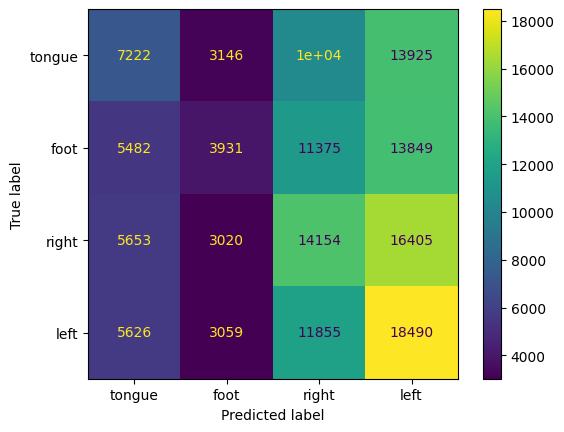

In [ ]:
y_pred = mlp.predict(X_test)

print("\nMÉTRICAS DA CLASSIFICAÇÃO")
# Todas as métricas do sklearn.metrics para classificação https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
print(f"Acurácia das amostras na classificação não apresentadas no treinamento: {accuracy_score(y_test, y_pred)}")
print(f"Acurácia balanceada na classificação das amostras não apresentadas no treinamento: {balanced_accuracy_score(y_test, y_pred)}")

print("")

relatorio = classification_report(y_test, y_pred, target_names=["tongue", "foot", "right", "left"])
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)

conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["tongue", "foot", "right", "left"])
cm_display.plot()
plt.show()


In [ ]:
#Prova real referente a construção da matriz de confusão
y_test.shape[0]

147615

In [ ]:
y_test.value_counts()

,count
label,
2,39232
3,39030
0,34716
1,34637


<h1> Conclusão</h1>
Os resultados foram péssimos com esses parâmetros concluindo que nestas condições não é possível de mapear o pensamento com o sinal. No próximo tentaremos tentar usar algoritmos de Automl para ver se existe algum algoritmo que consiga mapear melhor essa base de dados.

#Testando com Automl

In [ ]:
#Por enquanto pelo Colab o Automl não está funcionando, não instala o sklearn 0.24.2.

#Testando com GridSearchCV

In [ ]:
#Após 7 horas o Colab desistiu de continuar com o código (bem compreensível)
'''X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

parameters = {
    'hidden_layer_sizes': [(5), (20), (100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [200, 500, 1000, 5000, 10000]
}

classifier = MLPClassifier()
gridSearch = GridSearchCV(estimator=classifier, param_grid=parameters, cv = 5, scoring='accuracy')
gridSearch.fit(X_train, y_train)
best = gridSearch.best_estimator_
predictions = best.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, predictions))'''

'X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)\n\nparameters = {\n    \'hidden_layer_sizes\': [(5), (20), (100)],\n    \'activation\': [\'relu\', \'tanh\', \'logistic\'],\n    \'solver\': [\'sgd\', \'adam\'],\n    \'learning_rate_init\': [0.0001, 0.001, 0.01, 0.1],\n    \'max_iter\': [200, 500, 1000, 5000, 10000]\n}\n\nclassifier = MLPClassifier()\ngridSearch = GridSearchCV(estimator=classifier, param_grid=parameters, cv = 5, scoring=\'accuracy\')\ngridSearch.fit(X_train, y_train)\nbest = gridSearch.best_estimator_\npredictions = best.predict(X_test)\nprint("Accuracy score:", accuracy_score(y_test, predictions))'

In [ ]:
#Vamos cortar o algoritmo, e reduzir em 3x a sua execução usando só 5 camadas ocultas
#Cv no GridSearchCV é cross validator e garante 5 base de testes e 5 base de treinos distintas, porém 5 vezes a mais de treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

parameters = {
    'hidden_layer_sizes': [(5)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [200, 500, 1000, 5000, 10000]
}

classifier = MLPClassifier()
gridSearch = GridSearchCV(estimator=classifier, param_grid=parameters, cv = 5, scoring='accuracy', verbose=1) #Verbose para ajudar no Debug
gridSearch.fit(X_train, y_train)
best = gridSearch.best_estimator_
predictions = best.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, predictions))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
#Levou acima de 8 horas o ultimo teste e o verbose 1 não é interessante
#teste unico para verificar o tempo de resposta
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

parameters = {
    'hidden_layer_sizes': [(5)],
    'activation': ['relu'],
    'solver': ['sgd'],
    'learning_rate_init': [0.0001],
    'max_iter': [200]
}

classifier = MLPClassifier()
gridSearch = GridSearchCV(estimator=classifier, param_grid=parameters, cv = 5, scoring='accuracy', verbose=2)
gridSearch.fit(X_train, y_train)
best = gridSearch.best_estimator_
predictions = best.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, predictions))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate_init=0.0001, max_iter=200, solver=sgd; total time=  22.6s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate_init=0.0001, max_iter=200, solver=sgd; total time=  18.1s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate_init=0.0001, max_iter=200, solver=sgd; total time=  20.5s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate_init=0.0001, max_iter=200, solver=sgd; total time=  18.6s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate_init=0.0001, max_iter=200, solver=sgd; total time=  29.1s
Accuracy score: 0.26725847884759213


In [ ]:
# Verbose 2 é perfeito, embora a acuracia seja horrivel (0.2672)
# Realizaremos o teste com menos parametros de learning_rate
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

parameters = {
    'hidden_layer_sizes': [(5)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.001],
    'max_iter': [200, 500, 1000, 5000, 10000]
}

classifier = MLPClassifier()
gridSearch = GridSearchCV(estimator=classifier, param_grid=parameters, cv = 5, scoring='accuracy', verbose=2) #Verbose para ajudar no Debug
gridSearch.fit(X_train, y_train)
best = gridSearch.best_estimator_
predictions = best.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, predictions))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=200, solver=sgd; total time=  14.9s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=200, solver=sgd; total time=  13.3s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=200, solver=sgd; total time=  11.2s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=200, solver=sgd; total time=  11.9s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=200, solver=sgd; total time=  24.7s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=200, solver=adam; total time=  52.6s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=200, solver=adam; total time= 2.0min
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=200, solver=adam; to

In [ ]:
# A acurácia foi horrivel, mesmo testando vários parametros. Acuracia: 0.2743
# Testaremos com 10 camadas ocultas
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

parameters = {
    'hidden_layer_sizes': [(10)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.001],
    'max_iter': [200, 500, 1000, 5000, 10000]
}

classifier = MLPClassifier()
gridSearch = GridSearchCV(estimator=classifier, param_grid=parameters, cv = 5, scoring='accuracy', verbose=2) #Verbose para ajudar no Debug
gridSearch.fit(X_train, y_train)
best = gridSearch.best_estimator_
predictions = best.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, predictions))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END activation=relu, hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=200, solver=sgd; total time=  12.9s
[CV] END activation=relu, hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=200, solver=sgd; total time=  12.4s
[CV] END activation=relu, hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=200, solver=sgd; total time=  11.1s
[CV] END activation=relu, hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=200, solver=sgd; total time=  10.8s
[CV] END activation=relu, hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=200, solver=sgd; total time=  23.7s
[CV] END activation=relu, hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=200, solver=adam; total time= 1.8min
[CV] END activation=relu, hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=200, solver=adam; total time= 1.4min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=200, solver=adam; total time= 2.6min
[CV] END activation=relu, hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=200, solver=adam; total time= 2.5min
[CV] END activation=relu, hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=200, solver=adam; total time= 2.2min
[CV] END activation=relu, hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=500, solver=sgd; total time=  10.4s
[CV] END activation=relu, hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=500, solver=sgd; total time=  28.8s
[CV] END activation=relu, hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=500, solver=sgd; total time=  11.9s
[CV] END activation=relu, hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=500, solver=sgd; total time=  13.7s
[CV] END activation=relu, hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=500, solver=sgd; total time=  10.6s
[CV] END activation=relu, hidden_laye

In [ ]:
# A acurácia foi horrivel, mesmo testando vários parametros com 15 camadas. Acuracia: 0.2836
# Testaremos com 100 camadas ocultas
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

parameters = {
    'hidden_layer_sizes': [(100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.001],
    'max_iter': [200, 500, 1000, 5000, 10000]
}

classifier = MLPClassifier()
gridSearch = GridSearchCV(estimator=classifier, param_grid=parameters, cv = 5, scoring='accuracy', verbose=2) #Verbose para ajudar no Debug
gridSearch.fit(X_train, y_train)
best = gridSearch.best_estimator_
predictions = best.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, predictions))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=100, learning_rate_init=0.001, max_iter=200, solver=sgd; total time= 6.1min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=100, learning_rate_init=0.001, max_iter=200, solver=sgd; total time= 6.1min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=100, learning_rate_init=0.001, max_iter=200, solver=sgd; total time= 6.0min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, hidden_layer_sizes=100, learning_rate_init=0.001, max_iter=200, solver=sgd; total time=  20.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, hidden_layer_sizes=100, learning_rate_init=0.001, max_iter=200, solver=sgd; total time=   5.5s


KeyboardInterrupt: 

In [ ]:
#O treino é de 6 minutos cada, 6 min*150 iterações = 15horas
# Iremos reduzir a quantidade de iterações máximas para uma unica de 10000
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

parameters = {
    'hidden_layer_sizes': [(100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.001],
    'max_iter': [10000]
}

classifier = MLPClassifier()
gridSearch = GridSearchCV(estimator=classifier, param_grid=parameters, cv = 5, scoring='accuracy', verbose=2) #Verbose para ajudar no Debug
gridSearch.fit(X_train, y_train)
best = gridSearch.best_estimator_
predictions = best.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, predictions))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END activation=relu, hidden_layer_sizes=100, learning_rate_init=0.001, max_iter=10000, solver=sgd; total time=14.8min
[CV] END activation=relu, hidden_layer_sizes=100, learning_rate_init=0.001, max_iter=10000, solver=sgd; total time= 8.5min
[CV] END activation=relu, hidden_layer_sizes=100, learning_rate_init=0.001, max_iter=10000, solver=sgd; total time=12.7min
[CV] END activation=relu, hidden_layer_sizes=100, learning_rate_init=0.001, max_iter=10000, solver=sgd; total time=14.6min
[CV] END activation=relu, hidden_layer_sizes=100, learning_rate_init=0.001, max_iter=10000, solver=sgd; total time= 9.9min
[CV] END activation=relu, hidden_layer_sizes=100, learning_rate_init=0.001, max_iter=10000, solver=adam; total time=12.8min
[CV] END activation=relu, hidden_layer_sizes=100, learning_rate_init=0.001, max_iter=10000, solver=adam; total time=16.3min
[CV] END activation=relu, hidden_layer_sizes=100, learning_rate_init=0.001, m

In [ ]:
#O Resultado melhorou um pouco, tivemos uma acuracia de 0.401 com os seguintes parametros:
#activation: logistic,
#solver Adam.
gridSearch.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': 100,
 'learning_rate_init': 0.001,
 'max_iter': 10000,
 'solver': 'adam'}

In [ ]:
#Como com 100 camadas ocultas tivemos o melhor resultado, faremos um teste com
#500 camadas ocultas com os melhores parametros de uma forma isolada sem o cross
#validation.

y = df['label']
X = df.drop('label', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

mlp = MLPClassifier(hidden_layer_sizes=(500), max_iter=10000, activation="logistic", learning_rate_init=0.001, solver="adam")
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
print(f"Acurácia das amostras na classificação não apresentadas no treinamento: {accuracy_score(y_test, y_pred)}")
relatorio = classification_report(y_test, y_pred, target_names=["tongue", "foot", "right", "left"])
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)

Acurácia das amostras na classificação não apresentadas no treinamento: 0.4436744233309623
Relatório de classificação das amostras não apresentadas no treinamento:
              precision    recall  f1-score   support

      tongue       0.49      0.35      0.41     34717
        foot       0.39      0.54      0.46     34669
       right       0.42      0.57      0.48     39157
        left       0.55      0.31      0.40     39072

    accuracy                           0.44    147615
   macro avg       0.46      0.44      0.44    147615
weighted avg       0.47      0.44      0.44    147615



<h1>Conclusão</h1>

A Acuracia em 5 e 10 camadas ocultas foi de quase 0.3, um aumento para 100 camadas ocultas (10x) foi para 0.4, um aumento para 500 (5x) camadas ocultas tivemos 0.45. Para atingirmos para esse problema tão complexo talvez fosse necessário aproximadamente 1 milhão de camadas ocultas para chegar em uma acurácia de 0.8 aproximadamente. Infelizmente, com os recursos computacionais atuais, o tempo para gerar uma rede MLP dessa seria extremamente alto.

#Auto-Gluon

##Com o drop total (Patient, time and epoch)

In [ ]:
#Divide a base
y = df['label']
X = df.drop('label', axis=1)
train_data, test_data, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Unifica a base dividida
train_data['label'] = y_train
test_data['label'] = y_test

#Gera o treino com limite de 3000 segundos com presets em medium
predictor = TabularPredictor(label='label').fit(train_data, time_limit=3000)

#Gera a predição
y_pred = predictor.predict(test_data.drop(columns=['label']))
y_pred.value_counts()

No path specified. Models will be saved in: "AutogluonModels/ag-20241201_205504"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.06 GB / 12.67 GB (79.3%)
Disk Space Avail:   74.01 GB / 107.72 GB (68.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

,count
label,
2,48125
3,44869
0,27738
1,26883


In [ ]:
#Mostra os resultados
print(classification_report(test_data['label'], y_pred))

              precision    recall  f1-score   support

           0       0.49      0.39      0.44     34881
           1       0.50      0.39      0.44     34426
           2       0.44      0.54      0.48     38971
           3       0.45      0.52      0.48     39337

    accuracy                           0.46    147615
   macro avg       0.47      0.46      0.46    147615
weighted avg       0.47      0.46      0.46    147615



In [ ]:
#Mostra os melhores algoritmos
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.464004,0.473730,accuracy,367.121963,8.922725,1724.114419,0.024559,0.001734,0.257608,2,True,10
1,KNeighborsDist,0.447651,0.449637,accuracy,347.861336,7.666056,1.530468,347.861336,7.666056,1.530468,1,True,2
2,KNeighborsUnif,0.417986,0.421480,accuracy,350.318915,7.947864,6.437716,350.318915,7.947864,6.437716,1,True,1
3,NeuralNetFastAI,0.382658,0.391872,accuracy,1.464792,0.079286,350.699673,1.464792,0.079286,350.699673,1,True,3
4,RandomForestGini,0.379474,0.366618,accuracy,17.771275,1.175648,1371.626669,17.771275,1.175648,1371.626669,1,True,6
5,RandomForestEntr,0.376412,0.373585,accuracy,9.269651,0.238951,944.889996,9.269651,0.238951,944.889996,1,True,7
6,ExtraTreesGini,0.352166,0.352104,accuracy,14.899529,0.372763,167.893375,14.899529,0.372763,167.893375,1,True,9
7,LightGBMXT,0.324351,0.321335,accuracy,18.585718,0.528932,86.253569,18.585718,0.528932,86.253569,1,True,4
8,LightGBM,0.299143,0.299565,accuracy,0.735749,0.025148,13.840257,0.735749,0.025148,13.840257,1,True,5
9,CatBoost,0.291922,0.293469,accuracy,0.124003,0.004238,20.937860,0.124003,0.004238,20.937860,1,True,8


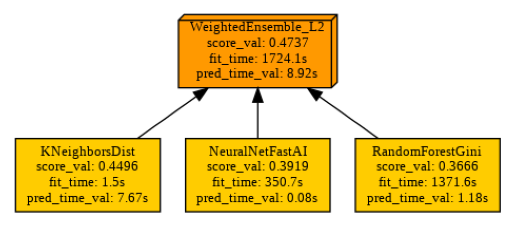

In [ ]:
#Mostra os modelos usados no comitê
predictor.plot_ensemble_model()
img = mpimg.imread('/content/AutogluonModels/ag-20241201_205504/ensemble_model.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
#Gera o treino com limite de 3000 segundos com presets em high
predictor = TabularPredictor(label='label').fit(train_data, time_limit=3600, presets='high')

#Gera a predição
y_pred = predictor.predict(test_data.drop(columns=['label']))
y_pred.value_counts()

No path specified. Models will be saved in: "AutogluonModels/ag-20241201_220900"
Preset alias specified: 'high' maps to 'high_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.38 GB / 12.67 GB (74.0%)
Disk Space Avail:   71.94 GB / 107.72 GB (66.8%)
Presets specified: ['high']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by s

,count
label,
3,42757
2,41948
1,31790
0,31120


In [ ]:
#Mostra os resultados
print(classification_report(test_data['label'], y_pred))

              precision    recall  f1-score   support

           0       0.46      0.41      0.43     34881
           1       0.46      0.42      0.44     34426
           2       0.45      0.48      0.46     38971
           3       0.45      0.49      0.47     39337

    accuracy                           0.45    147615
   macro avg       0.45      0.45      0.45    147615
weighted avg       0.45      0.45      0.45    147615



In [ ]:
#Mostra os melhores algoritmos
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2_FULL,0.451655,NaN,accuracy,384.273123,NaN,68.114792,0.015540,NaN,6.105983,2,True,10
1,KNeighborsDist_BAG_L1_FULL,0.448715,NaN,accuracy,382.317039,880.331824,1.036365,382.317039,880.331824,1.036365,1,True,7
2,KNeighborsDist_BAG_L1,0.448715,0.448973,accuracy,383.823787,880.331824,1.036365,383.823787,880.331824,1.036365,1,True,2
3,KNeighborsUnif_BAG_L1_FULL,0.419165,NaN,accuracy,382.671818,884.991864,1.199716,382.671818,884.991864,1.199716,1,True,6
4,KNeighborsUnif_BAG_L1,0.419165,0.419391,accuracy,390.234377,884.991864,1.199716,390.234377,884.991864,1.199716,1,True,1
5,NeuralNetFastAI_BAG_L1_FULL,0.332934,NaN,accuracy,1.940545,NaN,60.972443,1.940545,NaN,60.972443,1,True,8
6,LightGBMXT_BAG_L1_FULL,0.299482,NaN,accuracy,1.252081,NaN,11.277550,1.252081,NaN,11.277550,1,True,9
7,WeightedEnsemble_L2,NaN,0.451679,accuracy,NaN,892.962647,667.919877,NaN,0.050013,6.105983,2,False,5
8,NeuralNetFastAI_BAG_L1,NaN,0.327138,accuracy,NaN,12.580810,660.777529,NaN,12.580810,660.777529,1,False,3
9,LightGBMXT_BAG_L1,NaN,0.296795,accuracy,NaN,5.442089,110.172559,NaN,5.442089,110.172559,1,False,4


In [ ]:
#Mostra os modelos usados no comitê
predictor.plot_ensemble_model()


In [ ]:
img = mpimg.imread('/content/AutogluonModels/ag-20241201_220900/ensemble_model.png')
plt.imshow(img)
plt.axis('off')
plt.show()

##Sem drop (Dataset puro)

In [ ]:
#Divide a base
y = df2['label']
X = df2.drop('label', axis=1)
train_data, test_data, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Unifica a base dividida
train_data['label'] = y_train
test_data['label'] = y_test

#Gera o treino com limite de 3000 segundos com presets em medium
predictor = TabularPredictor(label='label').fit(train_data, time_limit=3000)

#Gera a predição
y_pred = predictor.predict(test_data.drop(columns=['label']))
y_pred.value_counts()

No path specified. Models will be saved in: "AutogluonModels/ag-20241201_234447"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       8.62 GB / 12.67 GB (68.0%)
Disk Space Avail:   71.71 GB / 107.72 GB (66.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions a

[1000]	valid_set's multi_error: 0.42061
[2000]	valid_set's multi_error: 0.353846
[3000]	valid_set's multi_error: 0.31611
[4000]	valid_set's multi_error: 0.288824
[5000]	valid_set's multi_error: 0.265022
[6000]	valid_set's multi_error: 0.251959
[7000]	valid_set's multi_error: 0.234543
[8000]	valid_set's multi_error: 0.220319
[9000]	valid_set's multi_error: 0.205515
[10000]	valid_set's multi_error: 0.196517


	0.8044	 = Validation score   (accuracy)
	2028.56s	 = Training   runtime
	34.96s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 474.19s of the 474.18s of remaining time.


[1000]	valid_set's multi_error: 0.103628
[2000]	valid_set's multi_error: 0.0580552


	Ran out of time, early stopping on iteration 2375. Best iteration is:
	[2346]	valid_set's multi_error: 0.0499274
	0.9501	 = Validation score   (accuracy)
	475.93s	 = Training   runtime
	3.52s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the -6.66s of remaining time.
	Ensemble Weights: {'LightGBM': 0.611, 'KNeighborsDist': 0.167, 'NeuralNetFastAI': 0.111, 'LightGBMXT': 0.111}
	0.9576	 = Validation score   (accuracy)
	0.16s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 3008.03s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 65.0 rows/s (3445 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20241201_234447")


,count
label,
2,39356
3,39033
1,34648
0,34578


In [ ]:
#Mostra os resultados
print(classification_report(test_data['label'], y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     34543
           1       0.96      0.95      0.95     34803
           2       0.95      0.95      0.95     39146
           3       0.95      0.95      0.95     39123

    accuracy                           0.95    147615
   macro avg       0.95      0.95      0.95    147615
weighted avg       0.95      0.95      0.95    147615



In [ ]:
#Mostra os melhores algoritmos
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.950452,0.957620,accuracy,2517.170175,52.995830,2917.106226,0.060110,0.002025,0.161228,2,True,6
1,LightGBM,0.944186,0.950073,accuracy,317.937426,3.519557,475.927765,317.937426,3.519557,475.927765,1,True,5
2,LightGBMXT,0.791546,0.804354,accuracy,1789.232626,34.956931,2028.564315,1789.232626,34.956931,2028.564315,1,True,4
3,KNeighborsDist,0.629834,0.627576,accuracy,408.050083,14.450776,1.996973,408.050083,14.450776,1.996973,1,True,2
4,KNeighborsUnif,0.584812,0.584615,accuracy,559.016021,16.122205,1.953993,559.016021,16.122205,1.953993,1,True,1
5,NeuralNetFastAI,0.509569,0.517852,accuracy,1.889931,0.066540,410.455946,1.889931,0.066540,410.455946,1,True,3


In [ ]:
#Mostra a quantidade de árvores usadas para realizar a eleição no comitê
lightgbm_model = predictor._trainer.load_model("LightGBM")
lightgbm_model.model.num_trees()

9384

##Com Drop parcial (drop da coluna epoch e time)

In [ ]:
#Divide a base
y = df2['label']
X = df2.drop('label', axis=1)
X.drop('time', axis=1, inplace=True)
X.drop('epoch', axis=1, inplace=True)
train_data, test_data, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Unifica a base dividida
train_data['label'] = y_train
test_data['label'] = y_test

#Gera o treino com limite de 3000 segundos com presets em medium
predictor = TabularPredictor(label='label').fit(train_data, time_limit=3000)

#Gera a predição
y_pred = predictor.predict(test_data.drop(columns=['label']))
y_pred.value_counts()

No path specified. Models will be saved in: "AutogluonModels/ag-20241202_173639"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.44 GB / 12.67 GB (82.4%)
Disk Space Avail:   74.01 GB / 107.72 GB (68.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

[1000]	valid_set's multi_error: 0.602322
[2000]	valid_set's multi_error: 0.58955
[3000]	valid_set's multi_error: 0.57852
[4000]	valid_set's multi_error: 0.570682
[5000]	valid_set's multi_error: 0.564296
[6000]	valid_set's multi_error: 0.561393
[7000]	valid_set's multi_error: 0.555588
[8000]	valid_set's multi_error: 0.555878
[9000]	valid_set's multi_error: 0.556459
[10000]	valid_set's multi_error: 0.555298


	0.4476	 = Validation score   (accuracy)
	1428.85s	 = Training   runtime
	20.25s	 = Validation runtime
Fitting model: RandomForestGini ... Training model for up to 1228.45s of the 1228.44s of remaining time.
	0.4351	 = Validation score   (accuracy)
	1023.63s	 = Training   runtime
	0.45s	 = Validation runtime
Fitting model: RandomForestEntr ... Training model for up to 187.59s of the 187.59s of remaining time.
	Time limit exceeded... Skipping RandomForestEntr.
Fitting model: CatBoost ... Training model for up to 164.95s of the 164.95s of remaining time.
	0.3147	 = Validation score   (accuracy)
	15.71s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesGini ... Training model for up to 149.22s of the 149.21s of remaining time.
	0.4218	 = Validation score   (accuracy)
	159.5s	 = Training   runtime
	0.61s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the -29.64s of remaining time.
	Ensemble Weights: {'NeuralNetFastA

,count
label,
2,42213
3,41822
0,31801
1,31779


In [ ]:
#Mostra os resultados
print(classification_report(test_data['label'], y_pred))

              precision    recall  f1-score   support

           0       0.53      0.49      0.51     34649
           1       0.55      0.50      0.52     34998
           2       0.52      0.57      0.54     39012
           3       0.52      0.56      0.54     38956

    accuracy                           0.53    147615
   macro avg       0.53      0.53      0.53    147615
weighted avg       0.53      0.53      0.53    147615



In [ ]:
#Mostra os melhores algoritmos
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.529912,0.543687,accuracy,382.890924,10.220832,1463.865371,0.282822,0.001632,0.216702,2,True,9
1,KNeighborsDist,0.501304,0.500435,accuracy,346.366997,9.104921,0.690053,346.366997,9.104921,0.690053,1,True,2
2,KNeighborsUnif,0.467032,0.463861,accuracy,353.721047,7.082109,5.917764,353.721047,7.082109,5.917764,1,True,1
3,NeuralNetFastAI,0.437855,0.451089,accuracy,2.336409,0.050340,264.121570,2.336409,0.050340,264.121570,1,True,3
4,LightGBM,0.437164,0.447605,accuracy,868.283720,20.247641,1428.851789,868.283720,20.247641,1428.851789,1,True,5
5,RandomForestGini,0.434766,0.435123,accuracy,17.336797,0.451425,1023.626083,17.336797,0.451425,1023.626083,1,True,6
6,ExtraTreesGini,0.419544,0.421771,accuracy,16.377632,0.608630,159.496684,16.377632,0.608630,159.496684,1,True,8
7,LightGBMXT,0.315354,0.327431,accuracy,2.104011,0.049429,25.240696,2.104011,0.049429,25.240696,1,True,4
8,CatBoost,0.299102,0.314659,accuracy,0.190267,0.003885,15.714279,0.190267,0.003885,15.714279,1,True,7


<h1>Conclusão</h1>
<font size=3>Pelo Auto-Gluon, usando a base sem tratamento, chegamos em uma acurácia de 0.97 o que pode chegar próximo de um overfitting, entretanto pode-se reduzir o tempo de execução do Autogluon para atingir uma acurácia de 0.80 e 0.95.</br>
O melhor algoritmo é om comitê de algoritmos KNN uniforme, Neural Fast AI (que é usado para deeplearning) e Light Gradient Boost. O segundo melhor é o Light Gradient Boost que também é um comitê de algoritmos de arvores fazendo a divisão por folhas. Os demais algoritmos não chegaram em uma acurácia de 0.80.</br>
O Light Gradient Boost Model usou 14196 árvores para chegar no resultado. </br>
A base com tratamento, removendo a coluna paciente, época e tempo que é o que é o ideal, afinal, o algoritmo deve saber se o paciente quer mover a parte do corpo apenas com os sinais do EEG. O resultado foi péssimo, atingindo 0.45 de acuracia aproximadamente.</br>
A base com tratamento, removendo a coluna época e tempo, que não fazem sentido e deixando a coluna paciente teve uma acurácia maior, com 0.53, que é menos pior que a acurácia do que com a coluna paciente. Esse aumento na acurácia indica que cada paciente pode gerar ondas cerebrais diferentes para cada pensamento.</br></br>

As perguntas que ficam para um próximo estudo são:</font>

<ul>
<li> Uma prótese criada em base do pensamento dessas 9 pessoas poderia ser imposta em uma décima?</li>
<li> O equipamento MindBEAGLE PRO que é muito usado na área cientifica custa € 71.995,00, como baratear esse custo?</li>
<li> A versão mais simplificada como o MindWave Mobile da Neurosky que custa U$ 129,00 atingiria melhores resultados?</li>
<li> Um algoritmo de deep learning com memória ou um algoritmo de machine learning que leva o tempo em consideração não seria melhor do que apenas um de classificação?</li>
</ul>

<font size=3> O autor continuará o trabalho analisando novos datasets e irá usar esse trabalho para base para serviços futuros.</font>